#### **Importamos las librerias**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

**Cargamos la base de datos preprocesada**

In [4]:
movies = pd.read_csv("../_src/Datasets/movies_clean.csv")

**Observemos información crucial sobre las columnas y el tipo de datos que contienen, así como la cantidad de registros no nulos presentes en cada columna**

In [354]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45452 entries, 0 to 45451
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4483 non-null   object 
 1   budget                 45452 non-null  int64  
 2   genres                 43067 non-null  object 
 3   id                     45452 non-null  int64  
 4   original_language      45441 non-null  object 
 5   overview               44511 non-null  object 
 6   popularity             45452 non-null  float64
 7   production_companies   33634 non-null  object 
 8   production_countries   39232 non-null  object 
 9   release_date           45452 non-null  object 
 10  revenue                45452 non-null  float64
 11  runtime                45206 non-null  float64
 12  spoken_languages       41554 non-null  object 
 13  status                 45372 non-null  object 
 14  tagline                20425 non-null  object 
 15  ti

Generamos un resumen estadístico que nos permita comprender la distribución y las características generales de las columnas numéricas, lo cual es especialmente útil para identificar posibles valores atípicos **_(outliers)_** que puedan requerir una atención adicional durante el análisis.

In [355]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.545200e+04,45452.000000,45452.000000,4.545200e+04,45206.000000,45452.000000,45452.000000,45452.000000,4.545200e+04
mean,4.231201e+06,107991.064926,2.926828,1.121905e+07,94.179821,5.623962,109.987283,1991.882579,6.589397e+02
std,1.742923e+07,112118.576134,6.006405,6.433916e+07,38.331639,1.915585,491.347202,24.057750,7.463082e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26367.750000,0.389040,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59872.000000,1.131324,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156330.500000,3.694242,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


A continuación, creamos un mapa de calor para visualizar la matriz de correlación de las variables numericas

In [356]:
mapa = movies.corr()
mapa.style.background_gradient(cmap='coolwarm')

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
budget,1.000000,-0.101373,0.449508,0.768665,0.134822,0.073128,0.676501,0.131673,-0.002135
id,-0.101373,1.000000,-0.082454,-0.071017,-0.119293,-0.165287,-0.064429,0.286581,-0.006751
popularity,0.449508,-0.082454,1.000000,0.506067,0.129684,0.153828,0.559847,0.131770,0.003213
revenue,0.768665,-0.071017,0.506067,1.000000,0.103886,0.083741,0.811994,0.088306,0.000793
runtime,0.134822,-0.119293,0.129684,0.103886,1.000000,0.156478,0.113482,0.078877,0.000891
vote_average,0.073128,-0.165287,0.153828,0.083741,0.156478,1.000000,0.123558,0.026792,0.005584
vote_count,0.676501,-0.064429,0.559847,0.811994,0.113482,0.123558,1.000000,0.106729,0.003600
release_year,0.131673,0.286581,0.131770,0.088306,0.078877,0.026792,0.106729,1.000000,-0.005013
return,-0.002135,-0.006751,0.003213,0.000793,0.000891,0.005584,0.003600,-0.005013,1.000000


Creamos un gráfico de dispersión para ver la relacion entre la columna `budget`(_presupuesto de la película_) y `revenue`(_recaudación de la pelicula_)

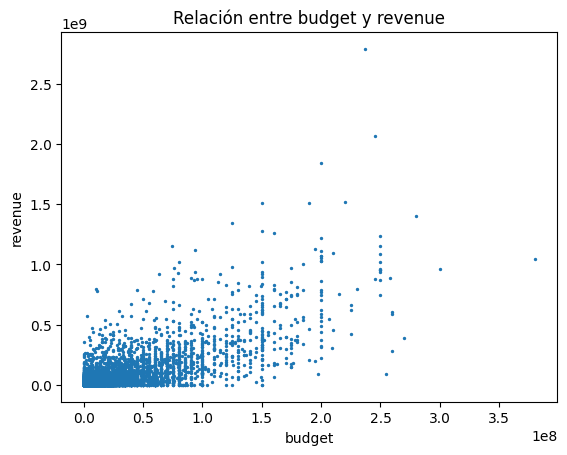

In [357]:
plt.scatter(movies["budget"], movies["revenue"],s=2)
plt.xlabel("budget")
plt.ylabel("revenue")
plt.title("Relación entre budget y revenue")
plt.show()

Notemos que el 25 %,50 % y 75 % percentil de las columnas revenue y budget son 0.

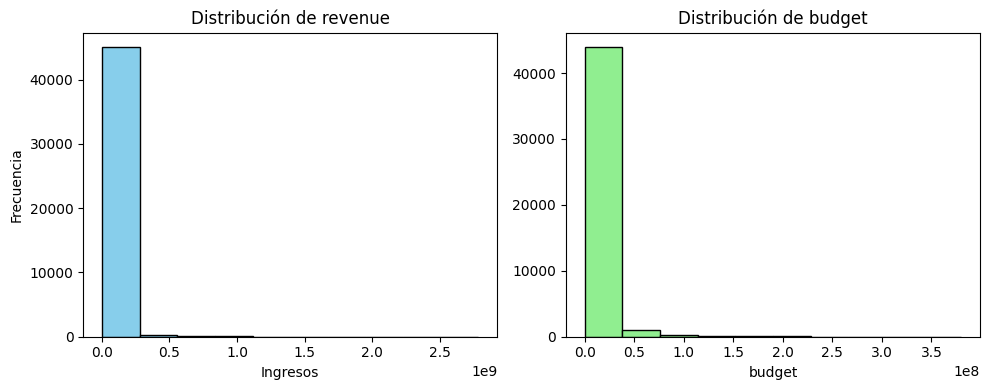

In [358]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(movies["revenue"], bins=10, color="skyblue", edgecolor="black")
plt.title("Distribución de revenue")
plt.xlabel("Ingresos")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(movies["budget"], bins=10, color="lightgreen", edgecolor="black")
plt.title("Distribución de budget")
plt.xlabel("budget")

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

La mayoria de los datos son 0, por lo que decido eliminar estas columnas, junto con la columna return. 

In [359]:
movies.drop(columns=["revenue","budget","return"],inplace=True)

Veamos si podemos observar algun valor atipico en las columnas `runtime` y `popularity`

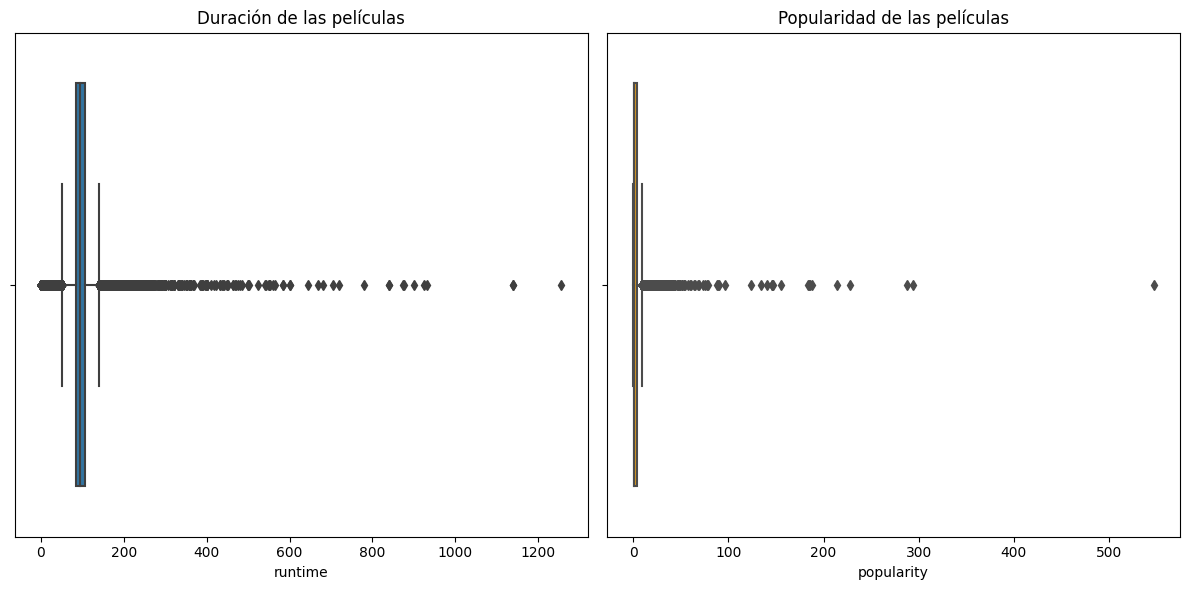

In [360]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=movies, x="runtime")
plt.title("Duración de las películas")

# Gráfico de caja para la columna "popularity"
plt.subplot(1, 2, 2)
sns.boxplot(data=movies, x="popularity", color="orange")
plt.title("Popularidad de las películas")

plt.tight_layout()  # Ajustar el espaciado entre los subplots

plt.show()

Teniendo esto en cuenta me voy a quedar con las peliculas que duran menos de 200 minutos (3 horas y 20 minutos)

In [361]:
movies.drop((movies[movies["runtime"]>200]).index,inplace=True)

Notemos que de la columna `overview`_(resumen de la pelicula)_, `tagline`_(frase celebre de la pelicula)_ podemos obtener informacion sobre las palabras mas importantes para cada pelicula. Procedemos a realizar una nube de palabras para cada columna.

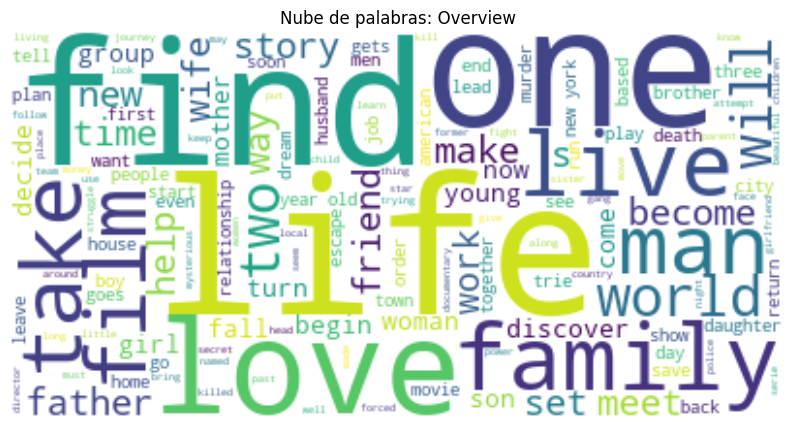

In [362]:
overview_words = " ".join(str(texto) for texto in movies["overview"] if isinstance(texto, str))
overview_words = overview_words.lower()
wordcloud = WordCloud(background_color='white').generate(overview_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de palabras: Overview')
plt.axis("off")
plt.show()

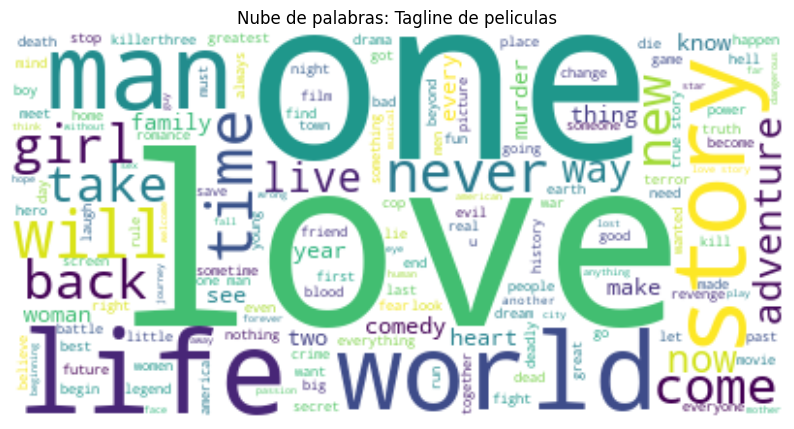

In [363]:
overview_words = " ".join(str(texto) for texto in movies["tagline"] if isinstance(texto, str))
overview_words = overview_words.lower()
wordcloud = WordCloud(background_color='white').generate(overview_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de palabras: Tagline de peliculas')
plt.axis("off")
plt.show()

Notemos que hay peliculas con 0 votos, por lo que decido eliminar dichas filas

In [364]:
print(movies[movies["vote_count"]==0].shape[0], "peliculas sin votar")  #DROPEAR los 0s

2835 peliculas sin votar


In [365]:
movies = movies.loc[movies["vote_count"]!=0]

La columna `status` nos dice el estado actual  de la pelicula, veamos cuales son

In [366]:
movies["status"].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

Notemos que las unicas peliculas que podemos recomendar para ver son las `Released` o las `Post Production` (puesto que estan por estrenarse)


In [367]:
movies = movies.loc[(movies["status"]=="Released")|(movies["status"]=="Post Production")]

In [368]:
movies["status"].value_counts()

Released           41891
Post Production       89
Name: status, dtype: int64

In [369]:
#Eliminamos la columna pues ya no la necesitamos
movies.drop(columns="status",inplace=True)

Veamos si hay peliculas repetidas, de haberlas las eliminamos

In [370]:
movies["id"].value_counts()

141971    9
152795    4
25541     4
97995     4
4912      4
         ..
18930     1
4475      1
24565     1
108200    1
67758     1
Name: id, Length: 41887, dtype: int64

In [371]:
movies.drop_duplicates(subset="id",inplace=True)

Veamos la frecuencia promedio de votos

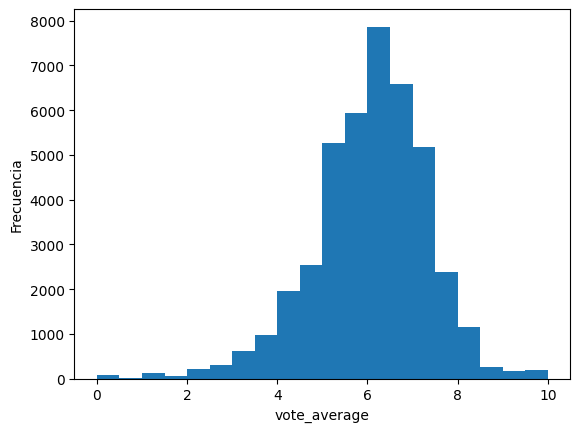

In [372]:
movies["vote_average"].plot(kind='hist',bins=20)
plt.xlabel('vote_average')
plt.ylabel('Frecuencia')
plt.show()

Veamos la frecuencia de películas a lo largo de los años

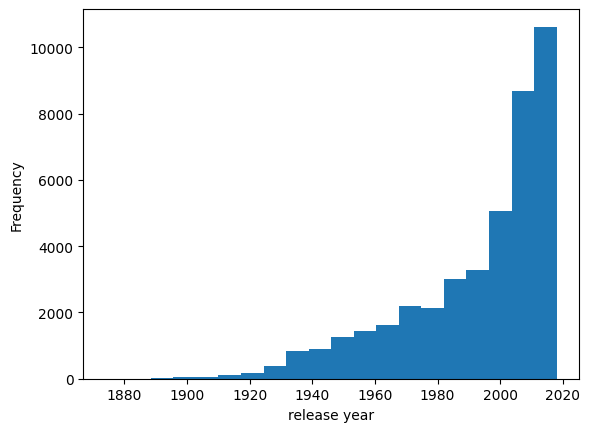

In [373]:
movies["release_year"].plot(kind='hist',bins=20)
plt.xlabel('release year')
plt.ylabel('Frequency')
plt.show()

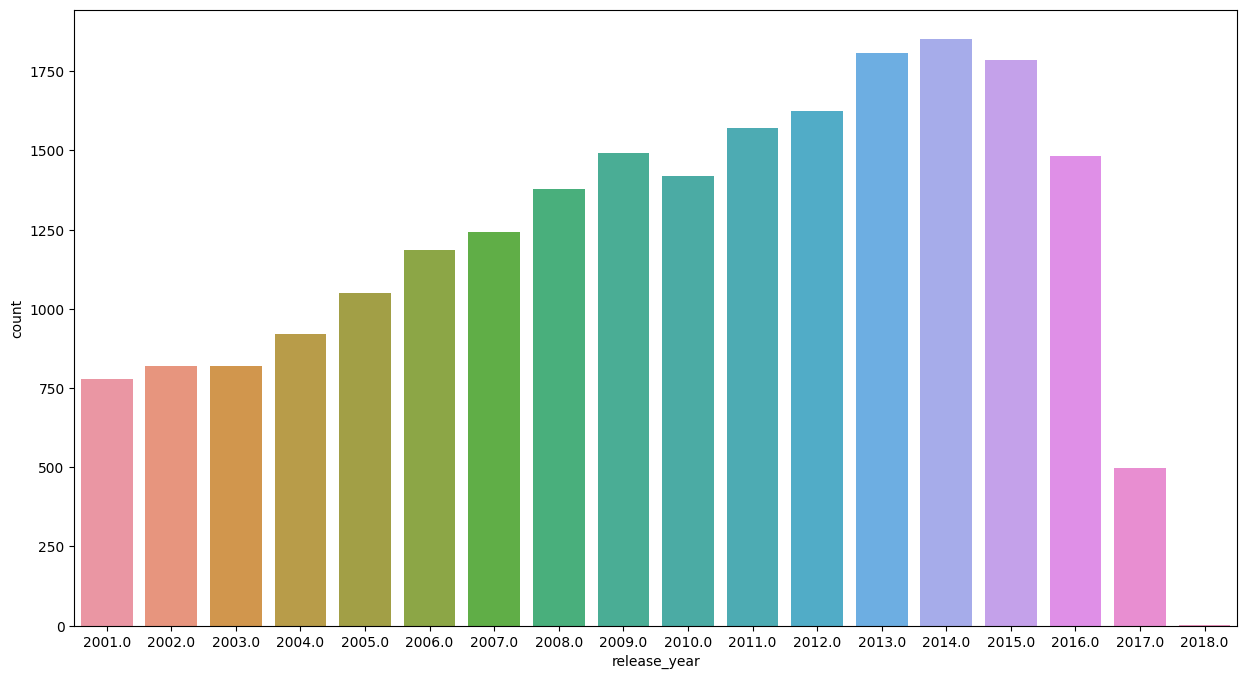

In [374]:
plt.figure(figsize=(15, 8))
plot = sns.countplot(x=movies['release_year'][movies['release_year'] > 2000])

Analicemos la columna generos

In [375]:
movies["genres"].value_counts()

Drama                                              4571
Comedy                                             3350
Documentary                                        2263
Drama, Romance                                     1250
Comedy, Drama                                      1097
                                                   ... 
Action, Animation, Comedy, Foreign                    1
Action, Romance, Mystery, Drama                       1
Foreign, Action, History, Comedy                      1
Action, Comedy, Crime, Drama, Mystery, Thriller       1
Family, Animation, Romance, Comedy                    1
Name: genres, Length: 3956, dtype: int64

In [376]:
# Veamos cuantos generos distintos hay
genres_list = []
for genres in movies['genres']:
    if str(genres)!= "nan":
        genres_list.extend(str(genres).split(', '))

unique_genres = list(set(genres_list))
print(f"Hay {len(unique_genres)} generos")
unique_genres


Hay 20 generos


['Horror',
 'Adventure',
 'Documentary',
 'War',
 'Foreign',
 'Mystery',
 'Comedy',
 'Thriller',
 'Science Fiction',
 'Drama',
 'TV Movie',
 'Western',
 'Fantasy',
 'History',
 'Family',
 'Romance',
 'Animation',
 'Crime',
 'Music',
 'Action']

Ahora analizaremos la relación entre el promedio de votos (vote_average) y el recuento de votos (vote_count) mediante un gráfico de dispersión

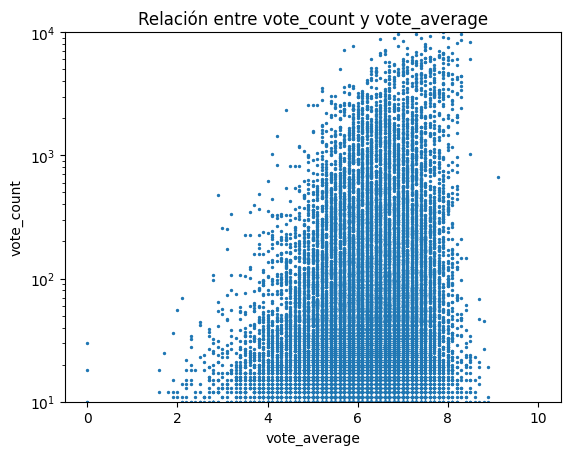

In [377]:
plt.scatter(movies["vote_average"], movies["vote_count"],s=2)
plt.xlabel("vote_average")
plt.ylabel("vote_count")
plt.ylim(10,10000)
plt.yscale("log")
plt.title("Relación entre vote_count y vote_average")
plt.show()

Para mejores recomendaciones, voy a tomar en cuenta peliculas con promedio de voto mayor a 4 y que la hayan votado mas de 20 personas

In [378]:
movies.shape

(41887, 17)

In [379]:
movies_filtered = movies[(movies["vote_average"] > 4) & (movies["vote_count"] > 20)]

Teniendo en cuenta todo el analisis hecho hasta ahora, seleccionare las columnas mas relevantes que usare en el modelo.

In [381]:
movies_filtered[["id","genres","production_companies","title","crew"]].to_csv("../_src/Datasets/movies_model.csv",index=False)